In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('D2.csv', na_filter=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      36183 non-null  object
 1   gender                    36183 non-null  object
 2   age                       36183 non-null  object
 3   admission_type_id         36183 non-null  int64 
 4   discharge_disposition_id  36183 non-null  int64 
 5   admission_source_id       36183 non-null  int64 
 6   time_in_hospital          36183 non-null  int64 
 7   medical_specialty         36183 non-null  object
 8   num_lab_procedures        36183 non-null  int64 
 9   num_procedures            36183 non-null  int64 
 10  num_medications           36183 non-null  int64 
 11  number_outpatient         36183 non-null  int64 
 12  number_emergency          36183 non-null  int64 
 13  number_inpatient          36183 non-null  int64 
 14  number_diagnoses      

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
print(df['age'].describe())
print(df['age'].value_counts())

count       36183
unique         11
top       [70-80)
freq         8990
Name: age, dtype: object
[70-80)     8990
[60-70)     8232
[80-90)     6386
[50-60)     6159
[40-50)     3328
[30-40)     1245
[90-100)    1072
[20-30)      561
[10-20)      179
[0-10)        22
               9
Name: age, dtype: int64


In [27]:
df['age'] = df['age'].replace('[0-10)', 5)
df['age'] = df['age'].replace('[10-20)', 15)
df['age'] = df['age'].replace('[20-30)', 25)
df['age'] = df['age'].replace('[30-40)', 35)
df['age'] = df['age'].replace('[40-50)', 45)
df['age'] = df['age'].replace('[50-60)', 55)
df['age'] = df['age'].replace('[60-70)', 65)
df['age'] = df['age'].replace('[70-80)', 75)
df['age'] = df['age'].replace('[80-90)', 85)
df['age'] = df['age'].replace('[90-100)', 95)
df['age'] = df['age'].replace('', 0)
df['age'] = df['age'].astype(float)

In [28]:
print(df['A1Cresult'].describe())
print(df['A1Cresult'].value_counts())

count     36183
unique        4
top        None
freq      28881
Name: A1Cresult, dtype: object
None    28881
>8       2993
Norm     2567
>7       1742
Name: A1Cresult, dtype: int64


In [29]:
print(df['diabetesMed'].describe())
print(df['diabetesMed'].value_counts())

count     36183
unique        2
top        True
freq      28286
Name: diabetesMed, dtype: object
True     28286
False     7897
Name: diabetesMed, dtype: int64


In [30]:
print(df['medical_specialty'].describe())
print(df['medical_specialty'].value_counts())

count       36183
unique         53
top       Invalid
freq        21927
Name: medical_specialty, dtype: object
Invalid                              21927
Emergency/Trauma                      3519
InternalMedicine                      3224
Family/GeneralPractice                1429
Cardiology                            1356
Surgery-General                        882
Radiologist                            788
Orthopedics                            551
Nephrology                             277
Orthopedics-Reconstructive             260
Surgery-Vascular                       227
Psychiatry                             197
Gastroenterology                       192
ObstetricsandGynecology                169
Pulmonology                            159
Urology                                157
Oncology                                91
Neurology                               89
Surgery-Cardiovascular/Thoracic         85
Surgery-Neuro                           70
Surgery-Cardiovascular       

In [31]:
print(df['time_in_hospital'].describe())
print(df['time_in_hospital'].value_counts())

count    36183.000000
mean         4.113064
std          2.822805
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: time_in_hospital, dtype: float64
3     6713
2     6567
1     5657
4     4868
5     3424
6     2538
7     1981
8     1331
9      876
10     700
11     521
12     395
13     365
14     247
Name: time_in_hospital, dtype: int64


In [43]:
print(df['number_inpatient'].describe())
print(df['number_inpatient'].value_counts())

count    3.618300e+04
mean    -5.812692e-17
std      1.000014e+00
min     -3.191336e-01
25%     -3.191336e-01
50%     -3.191336e-01
75%     -3.191336e-01
max      2.910643e+01
Name: number_inpatient, dtype: float64
-0.319134     31178
 1.229580      3557
 2.778294       915
 4.327008       306
 5.875721       126
 7.424435        44
 8.973149        31
 10.521862        7
 12.070576        6
 13.619290        5
 15.168003        2
 18.265431        2
 16.716717        2
 21.362858        1
 29.106427        1
Name: number_inpatient, dtype: int64


In [33]:
from sklearn.preprocessing import StandardScaler

# take 3 variables and drop the rest
df2 = df[['time_in_hospital', 'num_medications', 'number_outpatient', 'number_inpatient']]

# convert df2 to matrix
X = df2.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
from sklearn.cluster import KMeans

rs = 42
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    #train clustering with specified K
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

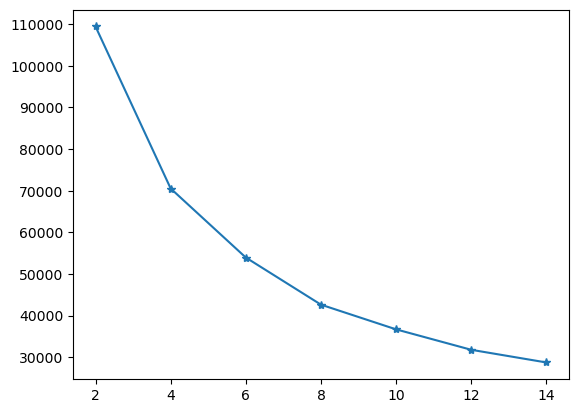

In [35]:
# plot the inertia vs K values
plt.plot(range(2, 15, 2), inertia_vals, marker='*')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))

KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.4100769254599945
KMeans(n_clusters=6, random_state=42)
Silhouette score for k=6 0.3093851680646968
KMeans(random_state=42)
Silhouette score for k=8 0.326741811984332


In [39]:
from sklearn.preprocessing import StandardScaler

# 
df2 = df[['age', 'time_in_hospital', 'number_inpatient']]

# convert df2 to matrix
X = df2.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sum of intra-cluster distance:  43145.81641436522
Centroid locations:
[-1.22329992 -0.3984046  -0.18502662]
[ 0.54623454 -0.44310162 -0.1617724 ]
[-0.01435757  0.18663433  3.85402782]
[ 0.32849536  1.52364397 -0.12396286]
Cluster membership
1    17479
0     9793
3     7467
2     1444
Name: Cluster_ID, dtype: int64


C:\Users\75278\AppData\Local\Temp\ipykernel_19244\3149015078.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster_ID'] = y


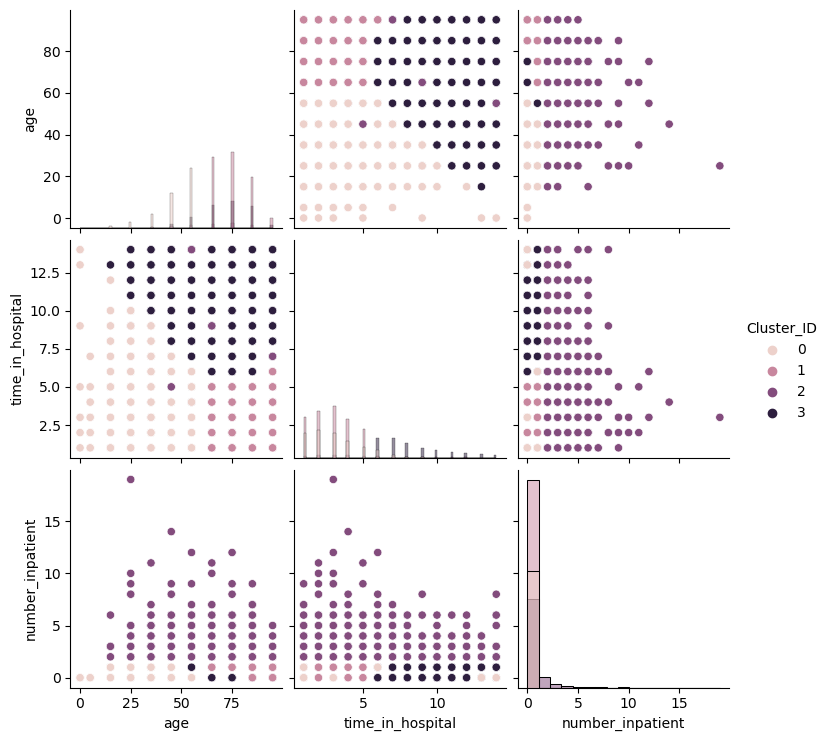

In [40]:
from sklearn.cluster import KMeans

rs = 42

# visualisation of k=4 clustering solution
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance: ", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)
    
# visualisation of K=4 clustering solution
y = model.predict(X)
df2['Cluster_ID'] = y

#how many record are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

#pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

Distribution for cluster 0


C:\Users\75278\AppData\Local\Temp\ipykernel_19244\1049016433.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=False)
C:\Users\75278\AppData\Local\Temp\ipykernel_19244\1049016433.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

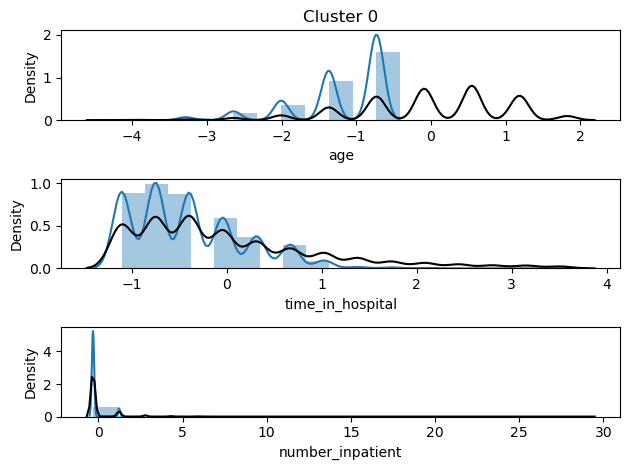

Distribution for cluster 1


C:\Users\75278\AppData\Local\Temp\ipykernel_19244\1049016433.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=False)
C:\Users\75278\AppData\Local\Temp\ipykernel_19244\1049016433.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

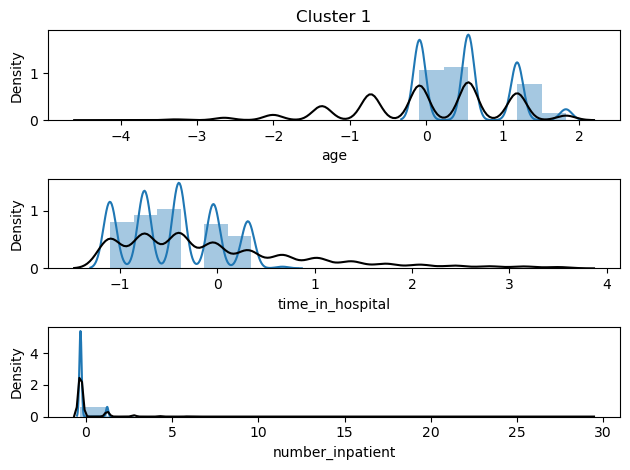

Distribution for cluster 2


C:\Users\75278\AppData\Local\Temp\ipykernel_19244\1049016433.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=False)
C:\Users\75278\AppData\Local\Temp\ipykernel_19244\1049016433.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

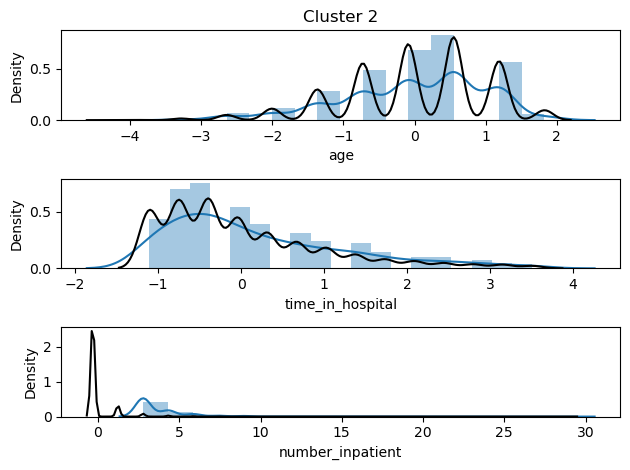

Distribution for cluster 3


C:\Users\75278\AppData\Local\Temp\ipykernel_19244\1049016433.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=False)
C:\Users\75278\AppData\Local\Temp\ipykernel_19244\1049016433.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

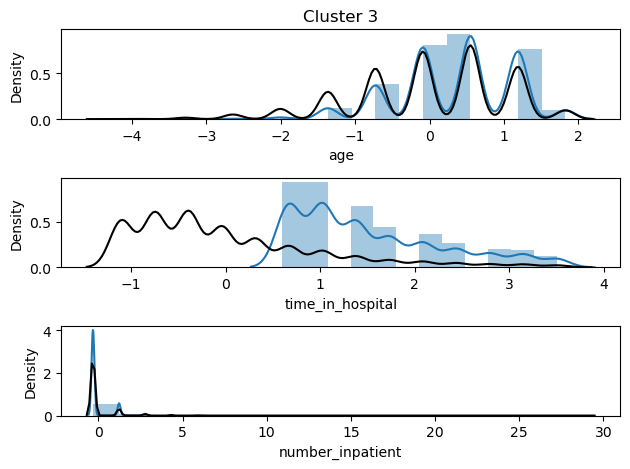

In [48]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more th
cols = ['age', 'time_in_hospital', 'number_inpatient']
n_bins = 20

# inspecting cluster 1 and 7
clusters_to_inspect = [0, 1, 2, 3]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    # create subplots
    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        #plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=False)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")
        
    plt.tight_layout()
    plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
df[['age', 'time_in_hospital', 'number_inpatient']] = StandardScaler().fit_transform(df[['age', 'time_in_hospital', 'number_inpatient']])

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sum of intra-cluster distance:  43145.81641436522
Centroid locations:
[-1.22329992 -0.3984046  -0.18502662]
[ 0.54623454 -0.44310162 -0.1617724 ]
[-0.01435757  0.18663433  3.85402782]
[ 0.32849536  1.52364397 -0.12396286]
Cluster membership
1    17479
0     9793
3     7467
2     1444
Name: Cluster_ID, dtype: int64


C:\Users\75278\AppData\Local\Temp\ipykernel_19244\1251540086.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster_ID'] = y


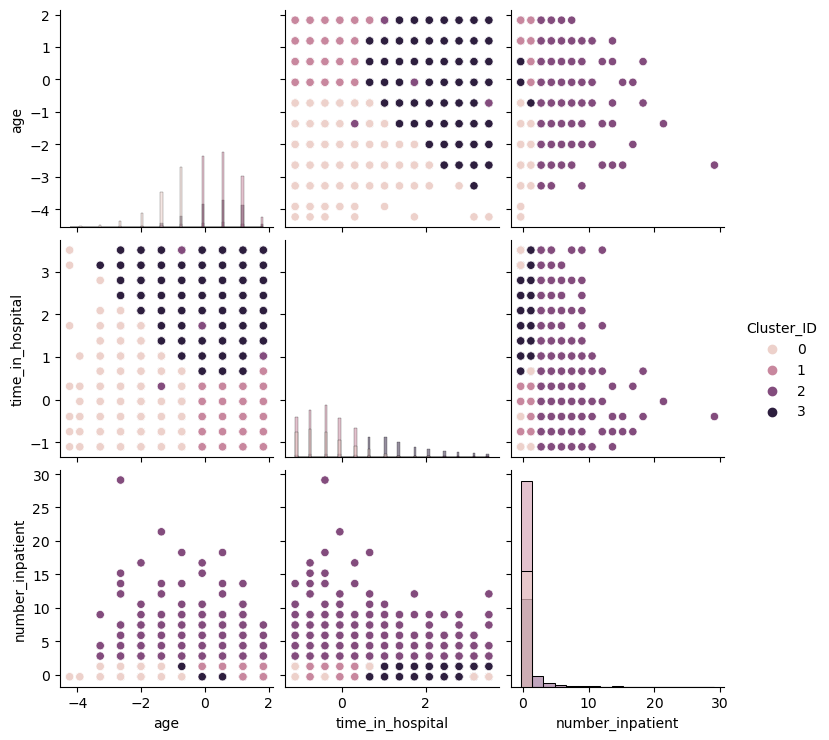

In [45]:
# 
df2 = df[['age', 'time_in_hospital', 'number_inpatient']]

# convert df2 to matrix
X = df2.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# visualisation of k=4 clustering solution
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance: ", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)
    
# visualisation of K=4 clustering solution
y = model.predict(X)
df2['Cluster_ID'] = y

#how many record are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

#pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

In [50]:
print(df['race'].describe())
print(df['race'].value_counts())

count         36183
unique            6
top       Caucasian
freq          27776
Name: race, dtype: object
Caucasian          27776
AfricanAmerican     5764
                     848
Hispanic             806
Other                696
Asian                293
Name: race, dtype: int64


In [51]:
df['race'] = df['race'].replace('', 0)
df['race'] = df['race'].replace('Caucasian', 1)
df['race'] = df['race'].replace('AfricanAmerican', 2)
df['race'] = df['race'].replace('Hispanic', 3)
df['race'] = df['race'].replace('Other', 4)
df['race'] = df['race'].replace('Asian', 5).astype(float)

In [52]:

# take 3 variables and drop the rest
df3 = df[['race', 'age', 'time_in_hospital', 'number_inpatient']]

# convert df2 to matrix
X = df3.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sum of intra-cluster distance:  76327.83346352277
Centroid locations:
[-0.22024798  0.29717619  1.4857252  -0.12674803]
[-0.39950256  0.04959803 -0.46437667 -0.17183032]
[ 1.75977704 -0.56375288 -0.27021871 -0.15138941]
[-0.04805051 -0.01155729  0.18741939  3.86837094]
Cluster membership
1    21275
0     7648
2     5835
3     1425
Name: Cluster_ID, dtype: int64


C:\Users\75278\AppData\Local\Temp\ipykernel_19244\610493899.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Cluster_ID'] = y


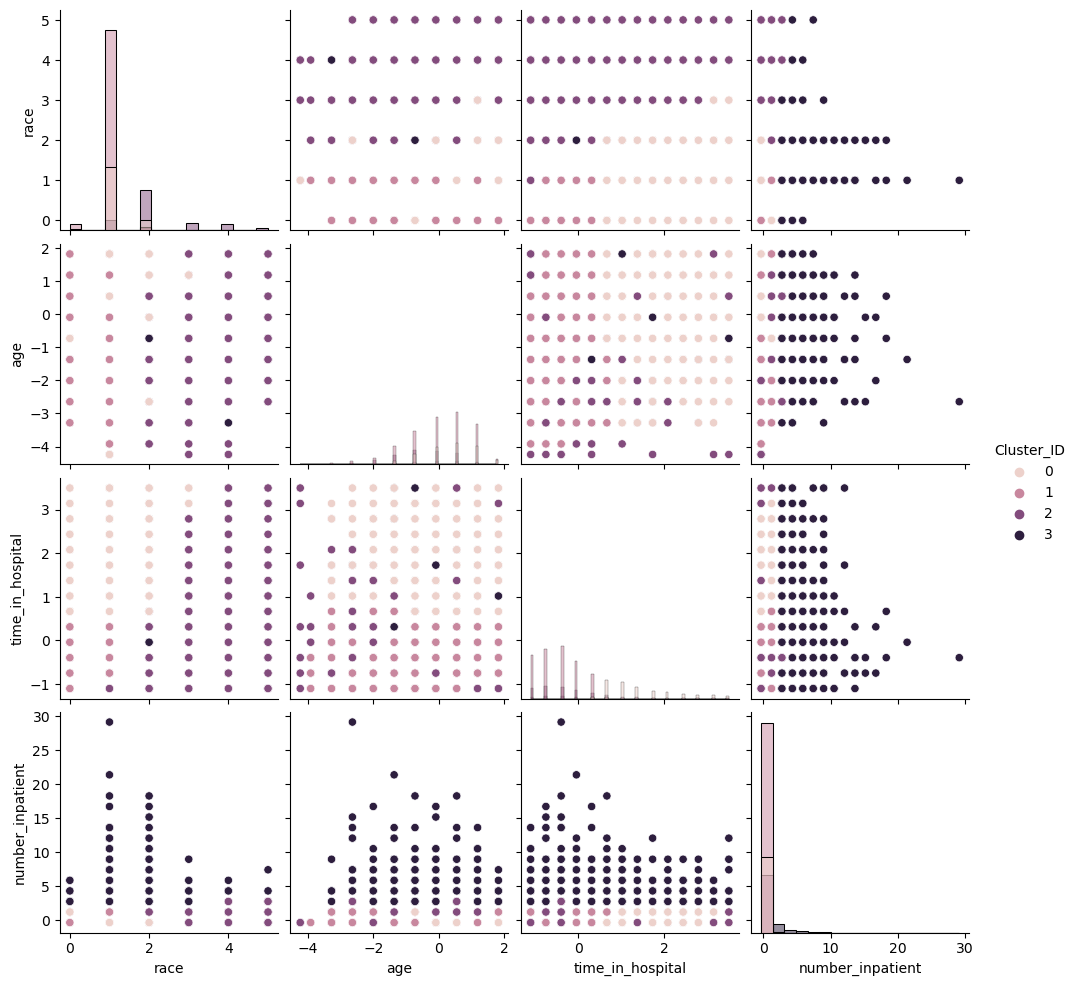

In [53]:
rs = 42

# visualisation of k=4 clustering solution
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance: ", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)
    
# visualisation of K=4 clustering solution
y = model.predict(X)
df3['Cluster_ID'] = y

#how many record are in each cluster
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())

#pairplot the cluster distribution.
cluster_g = sns.pairplot(df3, hue='Cluster_ID', diag_kind='hist')
plt.show()